### Overview of K-means
**K-means** is a fundamental clustering algorithm used in **unsupervised learning**.
  - **Objective**: Its primary goal is to partition a dataset of $N$ data points into $K$ distinct, non-overlapping groups (clusters). The objective is to ensure that data points within the same cluster are highly **similar** to each other, while being highly **dissimilar** from points in other clusters.
  - **The "K"**: This is a **hyperparameter** that you, the user, must specify. It represents the number of clusters you want the algorithm to find.
  - **The "Means"**: This refers to how the algorithm defines the center of each cluster. The center, known as a **centroid**, is the arithmetic **mean** (average) of all the data points belonging to that cluster.

**Objective Function**: K-means aims to find the cluster assignments that minimize an objective function called **Inertia**, or **Within-Cluster Sum of Squares (WCSS)**. This is the total squared distance from each data point $x_i$ to the centroid $\mu_k$ of its assigned cluster.\
The mathematical formula for the objective function $J$ is: $$J = \sum_{k=1}^{K}\sum_{x_{i}\in C_{k}}||x_{i} - \mu_{k}||^2$$
Where
  - $K$ is the number of clusters.
  - $C_k$ is the set of points in cluster $k$.
  - $\mu_k$ is the centroid of cluster $k$.
  - $||x_i - \mu_k||^2$ is the squared Euclidean distance.

The algorithm iteratively finds the set of $K$ centroids $\mu_k$ and the cluster assignments that make this $J$ value as small as possible.

### The K-means Algorithm
The standard K-means algorithm, also known as **Lloyd's algorithm**, uses an iterative two-step process. This process is a style of **EM (Expectation-Maximization)**.\
**Lloyd's Algorithm**:
- **Step 0: Initialization**
  - Choose $K$ initial points to serve as the starting centroids $\mu_1, \mu_2, ..., \mu_K$.
- **Step 1: Assignment Step (E-step)**
  - For each data point $x_i$: Calculate its distance to all $K$ centroids.
  - Assign $x_i$ to the cluster $k$ whose centroid $\mu_k$ is the **closest**.
  - Mathematically: $C(i) = \arg \min_{k} ||x_i - \mu_k||^2$
- **Step 2: Update Step (M-step)**
  - For each cluster $k$: Recalculate the position of its centroid $\mu_k$ by taking the **arithmetic mean** of all data points $x_i$ that were just assigned to that cluster.
  - Mathematically: $\mu_k = \frac{1}{|C_k|} \sum_{x_{i} \in C_{k}} x_i$
- **Step 3: Convergence**
  - Repeat **Step 1** and **Step 2** until a stopping condition is met. This happens when:
    - The centroids no longer move (or move very little).
    - The cluster assignments for the data points no longer change.
    - A maximum number of iterations is reached.

### Centroid Initialization Strategy
This step is critical because K-means is sensitive to its initial starting points. A poor initialization can cause the algorithm to get "stuck" in a **local optimum** (a solution that is good, but not the best possible).
- **Method 1: Random Initialization (Forgy Method)**
  - **How it works**: Randomly select $K$ data points from the dataset $X$ and set them as the initial centroids.
  - **Problem**: This is unreliable. You might accidentally pick $K$ points that are very close to each other, leading to a poor result.
  - **Solution**: Run the entire K-means algorithm multiple times (e.g., `n_init=10` in scikit-learn) with different random starting points. Keep the result that produces the lowest Inertia ($J$).
- **Method 2: K-means++ (The "Smart" Strategy)**
  - This is the **default and recommended** method for centroid initialization. Its goal is to select initial centroids that are **spread out and far from each other**, which helps the algorithm converge faster and produce better results.
  - **How it works**:
    1. **Choose the first centroid**:
      - Select the first centroid $\mu_1$ randomly from the dataset $X$.
    2. **Calculate the weights $D(x_i)$**:
      - For all data points $x_i$ in the dataset $X$, calculate its "weight" $D(x_i)$.
      - $D(x_i)$ is defined as the squared distance from $x_i$ to the nearest centroid that has already been chosen.
      - Formula: $$  D(x_i) = \min_{j} ||x_i - \mu_j||^2$$
        (Where $\mu_j$ is the set of centroids that have been chosen so far).
    3. **Select the next centroid**:
      - Select the next centroid (e.g., $\mu_2$) from the dataset $X$ via a **weighted probability distribution**.
      - The probability $P(x_i)$ of any point $x_i$ being selected is proportional to its weight $D(x_i)$. Points that are far away (with a large $D(x_i)$) will have a higher probability of being chosen.
      - The formula for this probability distribution is: $$  P(x_i) = \frac{D(x_i)}{\sum_{k=1}^{N} D(x_k)}$$
        (In simple terms: We create a "roulette wheel" where each point $x_i$ gets a slice proportional to $P(x_i)$, and then we spin the wheel to select the next centroid).
    4. **Repeat**:
      - Repeat **Step 2** and **Step 3** until $K$ centroids have been chosen.
  - **Benefit**: K-means++ helps the algorithm converge much faster and produces more consistent, high-quality clustering results.
  - Demo: [Link](https://www.youtube.com/watch?v=4qJWhvFQb9g)

### Strategy for Selecting the Optimal $K$
Since $K$ is a hyperparameter, we must experiment to find the best value. We typically run the algorithm with a range of $K$ values (e.g., $K$ from 1 to 10) and compare the results using one of these methods.
- **Method 1: The Elbow Method**
  - Run K-means for different values of $K$.
  - For each $K$, record the final WCSS (Inertia) value.
  - Plot $K$ on the x-axis and WCSS on the y-axis.
  - You will see that WCSS always decreases as $K$ increases. However, there will be a point on the graph where the rate of decrease slows down significantly, forming an **"elbow"**.
  - The $K$ value at this "elbow" point is considered the optimal $K$, as it represents the balance point where adding more clusters no longer provides a significant benefit.
  - **Drawback**: The "elbow" point is often ambiguous and subjective.
- **Method 2: The Silhouette Score**
  - This is a more robust metric that measures the "quality" of the clusters. It quantifies how well a point "fits" into its assigned cluster compared to neighboring clusters.
  - The score ranges from **-1 to +1**:
    - **+1**: Excellent clustering. The point is very compact within its cluster and far from other clusters.
    - **0**: The point is on or very close to the decision boundary between two clusters.
    - **-1**: Poor clustering. The point is likely assigned to the wrong cluster.
  - **How to calculate for one point $i$:**
    - $a(i)$: The average distance from $i$ to all other points **in the same cluster** (a measure of cohesion).
    - $b(i)$: The average distance from $i$ to all points in the nearest neighboring cluster (a measure of separation).
    - $s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$
  - **How to use**: Run K-means for various $K$ (e.g., 2 to 10). For each $K$, calculate the **average Silhouette Score** for all data points. **The $K$ value that yields the highest average Silhouette Score is considered the optimal $K$**.

### Advantages and Limitations
#### Advantages
- **Simple and Intuitive**: The algorithm is easy to understand and implement.
- **Fast and Efficient**: It is computationally fast, with a complexity of $O(K \cdot N \cdot d \cdot i)$ (where $N$ points, $K$ clusters, $d$ dimensions, $i$ iterations).
- **Converges**: Lloyd's algorithm is guaranteed to converge (though it may be to a local minimum).
- **Scalable**: Variants like **Mini-Batch K-means** can handle massive (out-of-core) datasets.
#### Limitations
- **Must choose $K$ manually**: This is its biggest drawback.
- **Sensitive to initialization**: A bad start can lead to a bad result (K-means++ helps, but doesn't eliminate this risk).
- **Sensitive to outliers**: Because centroids are based on the mean, a few extreme outliers can "pull" the centroid away from the true cluster center.
- **Assumes spherical clusters**: K-means performs best when clusters are spherical, roughly equal in size, and have similar densities. It fails on complex, non-convex shapes (like moons or rings).
- **Requires Feature Scaling**: K-means is based on Euclidean distance. If your features have different scales (e.g., Feature A is 0-1, Feature B is 0-10,000), the feature with the larger scale will dominate the distance calculation. You must **standardize (scale) your data** before using K-means.

### Hierarchical Clustering
This is a completely different family of clustering algorithms, often used when you **do not know the value of $K$ in advance**.
- **Core Idea**: Instead of finding $K$ clusters at once, it builds a hierarchy of clusters, which is visualized as a tree-like diagram called a dendrogram.
- **Type 1: Agglomerative (Bottom-up)**
  - Start with each data point as its own cluster ($N$ clusters).
  - Find the two closest clusters and merge them into a single new cluster.
  - Repeat step 2 until only one large cluster (containing all points) remains.
  - (The "closeness" between clusters is defined by a linkage strategy, e.g., single-linkage, complete-linkage, average-linkage, or Ward.)
- **Type 2: Divisive (Top-down)**
  - Start with all data points in one single cluster.
  - Recursively split the cluster into two sub-clusters in the most optimal way.
  - Repeat until each data point is its own cluster.
- **Benefits**:
  - **No need to pre-select $K$**. You can visualize the dendrogram and "cut" it at any level to get the number of clusters you find appropriate.
  - Provides a rich, informative visualization (the dendrogram).
- **Drawbacks**:
  - Very slow. The complexity is often $O(N^2 \log N)$ or $O(N^3)$, making it unusable for large datasets (whereas K-means is much faster).
  - Decisions (merges or splits) are irreversible (a greedy approach).

### Kmeans Example

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

In [28]:
n_samples = 300
centers = 4
X, y_true = make_blobs(n_samples=n_samples,
                       centers=centers, cluster_std=0.8,
                       random_state=42)

In [29]:
X.shape

(300, 2)

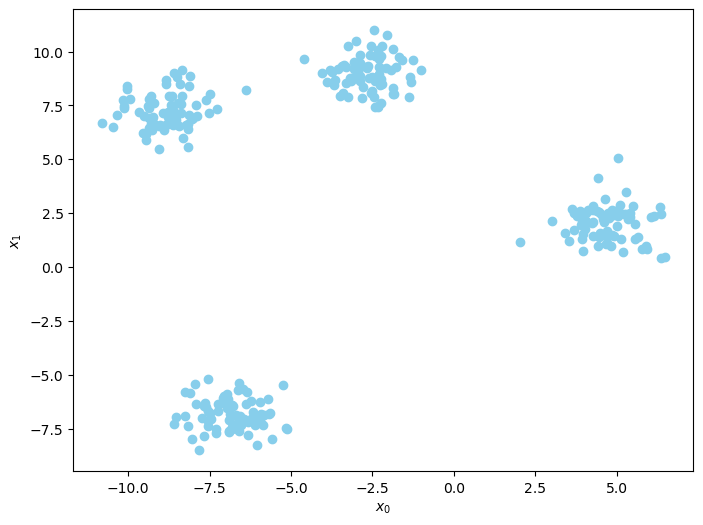

In [30]:
plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], color="skyblue", marker="o")
plt.xlabel("$x_{0}$")
plt.ylabel("$x_{1}$")
plt.show()

In [31]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KMeans(random_state=42))
])

In [32]:
param_grid = {
    "model__n_clusters": [2, 4, 6],
    "model__init": ["k-means++", "random"],
    "model__max_iter": [100, 200, 300]
}

In [33]:
def silhouette_scorer(estimator, X, y=None):
    labels = estimator.predict(X)
    
    if len(np.unique(labels)) < 2:
        return 0
    
    return silhouette_score(X, labels)

In [34]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring=silhouette_scorer,
    verbose=3,
    error_score=0
)

In [ ]:
grid_search.fit(X)

In [36]:
print("Best parameters: ", grid_search.best_params_)
print("Best silhouette score", grid_search.best_score_)

Best parameters:  {'model__init': 'k-means++', 'model__max_iter': 100, 'model__n_clusters': 4}
Best silhouette score 0.8329898326010259


In [37]:
best_model = grid_search.best_estimator_
best_model

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,100


In [38]:
X_scaled = best_model.named_steps["scaler"].transform(X)

labels = best_model.named_steps["model"].labels_

centroids = best_model.named_steps["model"].cluster_centers_

K_best = grid_search.best_params_['model__n_clusters']

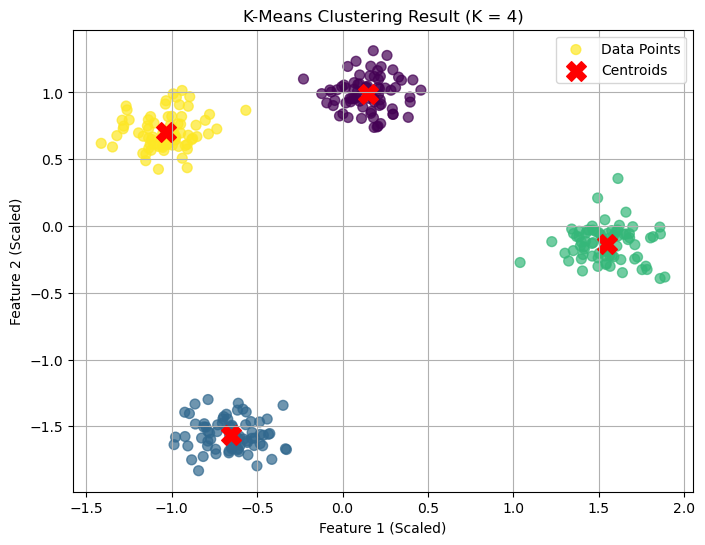

In [39]:
plt.figure(figsize=(8, 6))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title(f'K-Means Clustering Result (K = {K_best})')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

### Image Compression Project

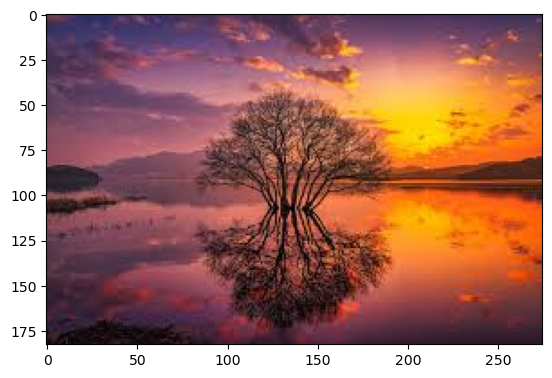

In [40]:
image = plt.imread("Data/image.jpg")
plt.imshow(image);

In [41]:
image_scaled = image.astype(np.float64) / 255.0

In [42]:
image.shape

(183, 275, 3)

In [43]:
height, width, channels = image.shape

In [44]:
pixel_data = image_scaled.reshape(-1, 3)

In [45]:
pixel_data.shape

(50325, 3)

In [46]:
kmeans_model = KMeans(
    n_clusters=16,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [47]:
pixel_data_sample = shuffle(pixel_data, random_state=42)[:10000]

In [48]:
kmeans_model.fit(pixel_data_sample)

,n_clusters,16
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [49]:
labels = kmeans_model.predict(pixel_data)
new_colors = kmeans_model.cluster_centers_

In [50]:
compressed_data = new_colors[labels]
compressed_image = compressed_data.reshape(height, width, channels)

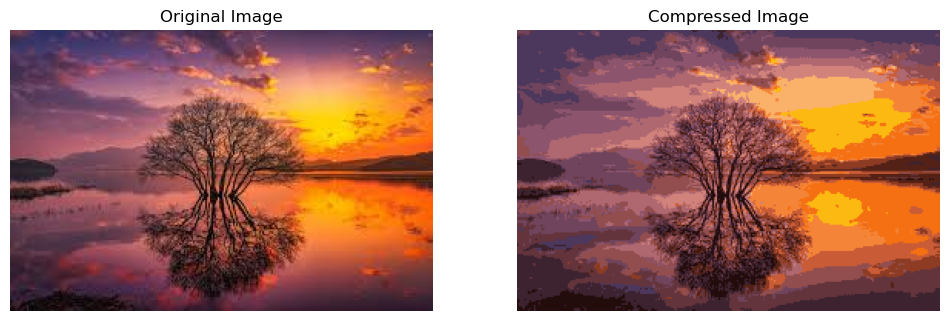

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(image_scaled)
ax1.set_title(f"Original Image")
ax1.axis('off')

ax2.imshow(compressed_image)
ax2.set_title(f"Compressed Image")
ax2.axis('off')

plt.show()